<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week6/Day4/W6D4_XC_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

# 1. Data Transformation:

In [5]:
ninja_data

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754
...,...,...,...,...
995,99.5996,20.080659,1033.072439,5.164919
996,99.6997,19.806464,1034.387284,4.630102
997,99.7998,19.984203,1033.152105,4.835813
998,99.8999,19.394747,1031.856516,4.694612


In [ ]:
Z-score Normalization

In [7]:
normalized_data = (ninja_data - np.mean(ninja_data)) / np.std(ninja_data)
normalized_data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Time,Temperature,Pressure,Chemical Concentration
0,-1.730320,0.253181,1.445618,-0.206395
1,-1.726856,0.071129,1.469211,-0.187538
2,-1.723391,0.160892,1.376261,0.101115
3,-1.719927,0.346308,1.412828,0.004858
4,-1.716463,0.302865,1.420736,0.170638
...,...,...,...,...
995,1.716463,0.028907,1.411558,0.121999
996,1.719927,-0.047831,1.504177,-0.250491
997,1.723391,0.001912,1.417170,-0.107218
998,1.726856,-0.163056,1.325907,-0.205561


Checking mean and std dev

In [9]:
normalized_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.684342e-17,1.136868e-16,-1.421085e-17,-4.121148e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.730320e+00,-1.701567e+00,-1.602480e+00,-1.692762e+00
25%,-8.651598e-01,-1.004823e+00,-9.989521e-01,-9.846385e-01
50%,1.229485e-16,8.758279e-03,-5.821975e-03,-1.307840e-02
75%,8.651598e-01,1.005554e+00,9.881835e-01,9.808653e-01
max,1.730320e+00,1.693999e+00,1.580563e+00,1.739122e+00


Logarithmic Scaling


In [11]:
ninja_data['ChemicalConcentrLog'] = np.log(ninja_data['Chemical Concentration'])
ninja_data[['Chemical Concentration', 'ChemicalConcentrLog']]

,Chemical Concentration,ChemicalConcentrLog
0,4.693416,1.546161
1,4.720490,1.551913
2,5.134934,1.636067
3,4.996730,1.608784
4,5.234754,1.655320
...,...,...
995,5.164919,1.641889
996,4.630102,1.532579
997,4.835813,1.576049
998,4.694612,1.546416


Fourier Transformation

In [33]:
pressure_fft = np.fft.fft(ninja_data['Pressure'])
pressure_fft


(1000,)

# 2. Statistical Analysis:

In [17]:
normalized_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.684342e-17,1.136868e-16,-1.421085e-17,-4.121148e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.730320e+00,-1.701567e+00,-1.602480e+00,-1.692762e+00
25%,-8.651598e-01,-1.004823e+00,-9.989521e-01,-9.846385e-01
50%,1.229485e-16,8.758279e-03,-5.821975e-03,-1.307840e-02
75%,8.651598e-01,1.005554e+00,9.881835e-01,9.808653e-01
max,1.730320e+00,1.693999e+00,1.580563e+00,1.739122e+00


In [18]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration,ChemicalConcentrLog
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754,1.563020
std,28.910854,3.574943,14.203350,1.436505,0.303470
min,0.000000,13.897407,990.284418,2.559310,0.939738
25%,25.000000,16.386984,998.852247,3.576024,1.274251
50%,50.000000,20.008666,1012.950967,4.970976,1.603616
75%,75.000000,23.570373,1027.062114,6.398067,1.855996
max,100.000000,26.030294,1035.471676,7.486763,2.013136


In [21]:
correlation_matrix = normalized_data.corr()
correlation_matrix

,Time,Temperature,Pressure,Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000


**CONCLUSION: There is a strong negative correlation between temperature and time. What apparently means cooling the process over time.**

**Other parameters have no significant correlation**

In [22]:
t_stat, p_value = stats.ttest_ind(normalized_data['Time'], normalized_data['Temperature'])
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.2704217987576956e-15
P-value: 0.999999999999999


Tools: Explore scipy.stats for advanced statistical functions

In [24]:
a = normalized_data['Temperature']
stats.describe(a)

DescribeResult(nobs=1000, minmax=(-1.7015673245835539, 1.693999308172313), mean=1.1368683772161603e-16, variance=1.0010010010010013, skewness=-0.012441012211139418, kurtosis=-1.4525832549763218)

# 3. Data Visualization:

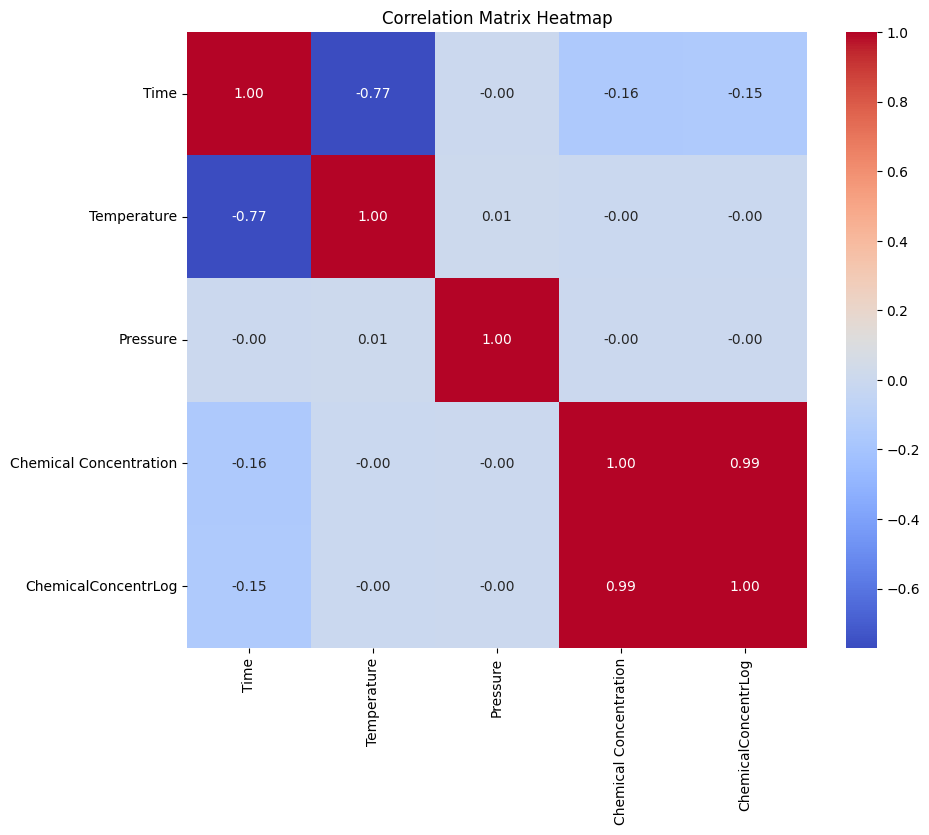

In [25]:
correlation_matrix = ninja_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

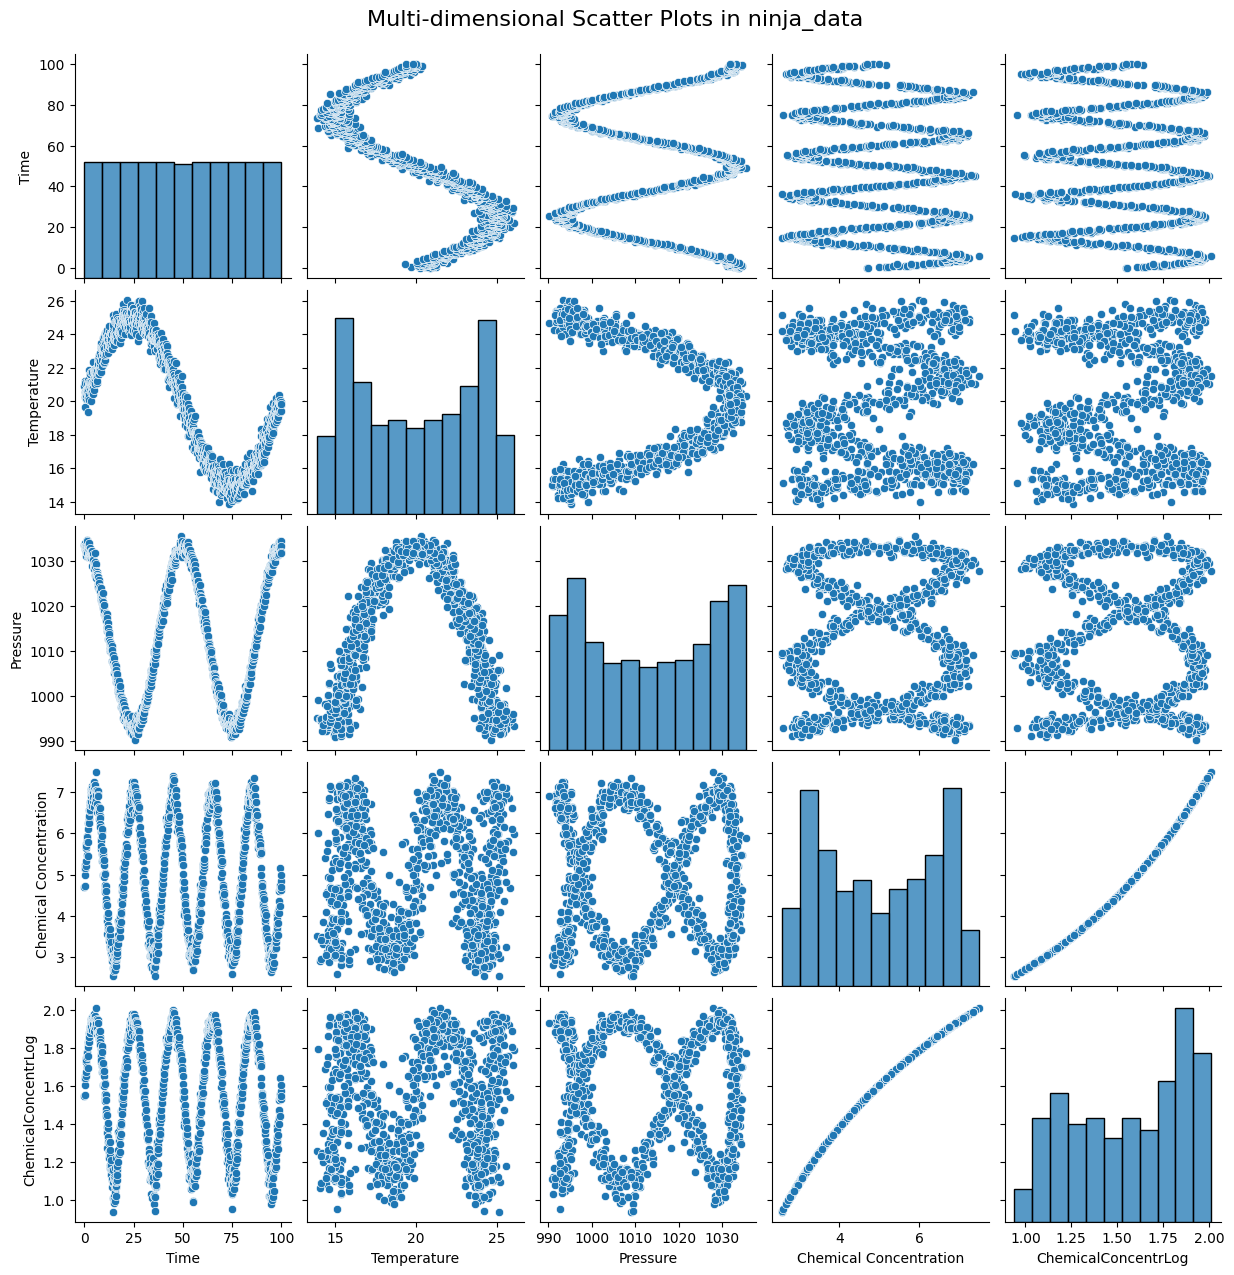

In [28]:
sns.pairplot(ninja_data)
plt.suptitle('Multi-dimensional Scatter Plots in ninja_data', size=16, y=1.02)
plt.show()

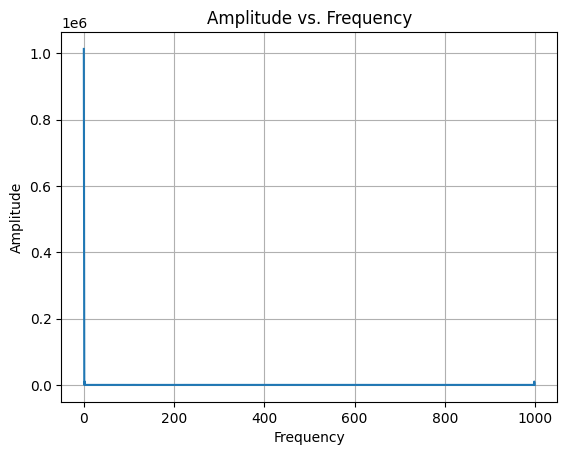

In [31]:
plt.plot(pressure_fft)
plt.title('Amplitude vs. Frequency')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 4. Interpretation:

In [ ]:
There is a strong negative correlation between temperature and time. What apparently means cooling the process over time.

Other parameters have no significant correlation